In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [47]:
random_state=42

In [32]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [33]:
df.columns  = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')    
df.drop(columns=['patientid', 'doctorincharge'], inplace=True)
df.head()

,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,sleepquality,...,functionalassessment,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [138]:
df["diagnosis"].value_counts()

diagnosis
0    1389
1     760
Name: count, dtype: int64

In [35]:
df.isna().sum()

age                          0
gender                       0
ethnicity                    0
educationlevel               0
bmi                          0
smoking                      0
alcoholconsumption           0
physicalactivity             0
dietquality                  0
sleepquality                 0
familyhistoryalzheimers      0
cardiovasculardisease        0
diabetes                     0
depression                   0
headinjury                   0
hypertension                 0
systolicbp                   0
diastolicbp                  0
cholesteroltotal             0
cholesterolldl               0
cholesterolhdl               0
cholesteroltriglycerides     0
mmse                         0
functionalassessment         0
memorycomplaints             0
behavioralproblems           0
adl                          0
confusion                    0
disorientation               0
personalitychanges           0
difficultycompletingtasks    0
forgetfulness                0
diagnosi

In [37]:
df["gender"].value_counts()

gender
1    1088
0    1061
Name: count, dtype: int64

In [111]:
df["gender"] == 1

0       False
1       False
2       False
3        True
4       False
        ...  
2144    False
2145    False
2146    False
2147     True
2148    False
Name: gender, Length: 2149, dtype: bool

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['diagnosis']), 
                                                    df['diagnosis'], 
                                                    test_size=0.2, 
                                                    random_state=random_state)

In [54]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, x_train.columns),
    ]
)

In [136]:
df.iloc[[0],:]

,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,sleepquality,...,functionalassessment,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0


In [ ]:
rf_base = RandomForestClassifier(random_state=random_state)

param_grid = {  
    'classifier__n_estimators': [x for x in range(1, 200, 10)],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [x for x in range(1, 50, 5)]
}

pipeline_rf = Pipeline(steps = [
    ('processor', preprocessor),
    ('classifier', rf_base),
                            ])

rf = GridSearchCV(pipeline_rf, cv=3, param_grid=param_grid)

In [99]:
rf.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'gender', 'ethnicity', 'educationlevel', 'bmi', 'smoking',
       'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality',
       'familyhistoryalzheimers', 'cardiovasculardisease', 'diabetes',
       'depression...
       'disorientation', 'personalitychanges', 'difficultycompletingtasks',
       'forgetfulness'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 6, 11, 16, 21, 26,
                                                          31, 36, 41, 46],
                         'classifier__n_estimators': [1, 11, 21, 31, 41, 51, 61,
                                                      71, 81, 91, 101, 111, 121,
                                                      131, 141, 151, 161, 171,
                                                      181, 191]})

In [121]:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 101}

In [104]:
print(classification_report(y_train, rf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1112
           1       0.98      0.93      0.95       607

    accuracy                           0.97      1719
   macro avg       0.97      0.96      0.96      1719
weighted avg       0.97      0.97      0.97      1719



In [102]:
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.96      0.80      0.87       153

    accuracy                           0.92       430
   macro avg       0.93      0.89      0.90       430
weighted avg       0.92      0.92      0.91       430



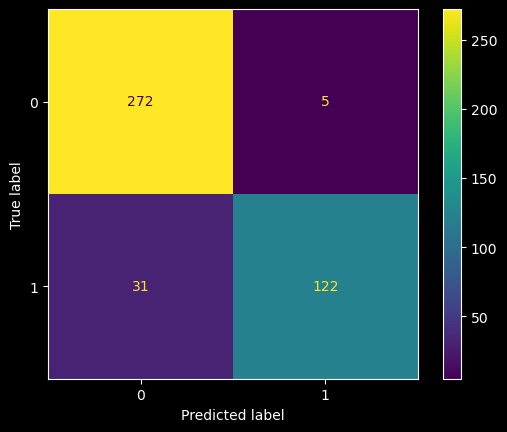

In [103]:
cm = confusion_matrix(y_test,rf.predict(x_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()